In [1]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Right now we classify by using title name


In [2]:
df.shape

(20800, 5)

In [3]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [4]:
df.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.title.isnull().sum()

558

In [7]:
df= df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


In [9]:
from sklearn.utils import shuffle
df= shuffle(df)

In [10]:
#get the independent features
X = df["title"]
#get dependent features
y = df["label"]

In [11]:
y.value_counts()

0    10361
1     7924
Name: label, dtype: int64

In [12]:
# import tensorflow libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
#select GPU working %
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [14]:
X

10461    Five Sauces for the Modern Cook - The New York...
211      Trump Attacks Senator’s Credibility Over Gorsu...
10294    Sweden on the brink? Police force pushed to br...
16973    Internet Under Attack Since Transfer to the UN...
19038    Amazing! Voter Fraud Problem Solved Eight Days...
                               ...                        
1189     Cruz: Gorsuch A Principled Constitutionalist, ...
6310          Re: How is that Cancer Moonshot Progressing?
11578    Cannabis Aficionados Develop THC-A Crystalline...
9481      BBC loses circling hippos to National Geographic
11481    Amazon Now Worth Twice As Much As Walmart - Br...
Name: title, Length: 18285, dtype: object

In [15]:
y

10461    0
211      0
10294    1
16973    1
19038    1
        ..
1189     0
6310     1
11578    1
9481     1
11481    0
Name: label, Length: 18285, dtype: int64

# Text Preprocessing

In [16]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')

review_lines = list()
lines = X.values.tolist()

for line in lines:
    tokens = word_tokenize(line)
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('','',string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    words = [wn.lemmatize(w) for w in words if w not in stopwords]
    review_lines.append(words)

In [17]:
len(review_lines)

18285

In [18]:
review_lines

[['five', 'sauce', 'modern', 'cook', 'new', 'york', 'time'],
 ['trump',
  'attack',
  'senator',
  'credibility',
  'gorsuch',
  'comment',
  'new',
  'york',
  'time'],
 ['sweden',
  'brink',
  'police',
  'force',
  'pushed',
  'breaking',
  'point',
  'violence',
  'amid',
  'migrant',
  'influx'],
 ['internet',
  'attack',
  'since',
  'transfer',
  'un',
  'washington',
  'prepares',
  'emp'],
 ['amazing',
  'voter',
  'fraud',
  'problem',
  'solved',
  'eight',
  'day',
  'election'],
 ['дай', 'миллион', 'я', 'телевизор'],
 ['singer',
  'joy',
  'villa',
  'see',
  'sale',
  'spike',
  'maga',
  'grammys',
  'dress'],
 ['pope',
  'francis',
  'condemns',
  'barbaric',
  'attack',
  'egyptian',
  'christian'],
 ['barack',
  'obama',
  'delay',
  'suspend',
  'election',
  'hillary',
  'forced',
  'new',
  'fbi',
  'email',
  'investigation'],
 ['state',
  'gop',
  'leader',
  'move',
  'swiftly',
  'party',
  'bicker',
  'congress',
  'new',
  'york',
  'time'],
 ['report',
  'me

In [235]:
x = review_lines

In [236]:
from tensorflow.keras.preprocessing.text import Tokenizer
#vectorize the text samples into a 2D ineger tensor 
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(x)
sequences = tokenizer_obj.texts_to_sequences(x)



#pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen = 30)
print('Shape of review tensor:', review_pad.shape)


Found 18741 unique tokens.
Shape of review tensor: (18285, 30)


In [237]:
print(review_pad)

[[   0    0    0 ...    1    3    2]
 [   0    0    0 ... 2818 3104  734]
 [   0    0    0 ...    1    3    2]
 ...
 [   0    0    0 ...  670 1146    5]
 [   0    0    0 ...    1    3    2]
 [   0    0    0 ... 3413 2560 1434]]


In [238]:
review_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,   91,
        397, 2199,  858, 3103, 1517,    1,    3,    2])

In [239]:
import numpy as np
X=np.array(review_pad)
y=np.array(y)

In [240]:
X

array([[   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ..., 2818, 3104,  734],
       [   0,    0,    0, ...,    1,    3,    2],
       ...,
       [   0,    0,    0, ...,  670, 1146,    5],
       [   0,    0,    0, ...,    1,    3,    2],
       [   0,    0,    0, ..., 3413, 2560, 1434]])

In [241]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [242]:
idx = tokenizer_obj.word_index
inverse_map = dict(zip(idx.values(), idx.keys()))


def return_to_sentence(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text


In [243]:
print(return_to_sentence(X[0]))

end line penn station departure board new york time


In [244]:
y[0]

0

In [245]:
print("data:", X.shape)
print("label:", y.shape)

data: (18285, 30)
label: (18285,)


# Split data

In [246]:
Validation_split = 0.1
num_validation_samples = int(Validation_split * X.shape[0])

x_train = X[:-num_validation_samples]
y_train = y[:-num_validation_samples]
x_val = X[-num_validation_samples:]
y_val = y[-num_validation_samples:]

In [247]:
print('Shape of x_train tensor:', x_train.shape)
print('Shape of y_train tensor:', y_train.shape)
print('Shape of x_val tensor:', x_val.shape)
print('Shape of y_val tensor:', y_val.shape)

Shape of x_train tensor: (16457, 30)
Shape of y_train tensor: (16457,)
Shape of x_val tensor: (1828, 30)
Shape of y_val tensor: (1828,)


# save our train, val data

In [248]:
import pickle

pickle_out = open("x_train.pickle","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle","wb")
pickle.dump(y_train,pickle_out)
pickle_out.close()

pickle_out = open("x_val.pickle","wb")
pickle.dump(x_val,pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle","wb")
pickle.dump(y_val,pickle_out)
pickle_out.close()

In [249]:
#load
X_train = pickle.load(open("x_train.pickle","rb"))
Y_train = pickle.load(open("y_train.pickle","rb"))

X_val = pickle.load(open("x_val.pickle","rb"))
Y_val = pickle.load(open("y_val.pickle","rb"))

In [250]:
print('Shape of x_train tensor:', X_train.shape)
print('Shape of y_train tensor:', Y_train.shape)
print('Shape of x_val tensor:', X_val.shape)
print('Shape of y_val tensor:', Y_val.shape)

Shape of x_train tensor: (16457, 30)
Shape of y_train tensor: (16457,)
Shape of x_val tensor: (1828, 30)
Shape of y_val tensor: (1828,)


# Pretrained embedding layer

In [251]:
import os
import numpy as np

In [252]:
GLOVE_DIR =  'glove/glove.6B.100d.txt'

embeddings_index = {}
f = open(GLOVE_DIR, encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [253]:
EMBEDDING_DIM = 100

num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i < num_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [254]:
print(num_words)

18742


# build model

In [255]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [256]:
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, weights = [embedding_matrix],trainable= False))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1,activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [257]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1874200   
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 256)               234496    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 2,108,953
Trainable params: 234,753
Non-trainable params: 1,874,200
_________________________________________________________________


In [258]:
from keras.callbacks import ModelCheckpoint
filepath="best_model.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

In [259]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), epochs = 5, batch_size = 31, callbacks = callbacks_list)

Epoch 1/5
531/531 [==============================] - 7s 10ms/step - loss: 0.3092 - accuracy: 0.8549 - val_loss: 0.1978 - val_accuracy: 0.9114

Epoch 00001: val_accuracy improved from -inf to 0.91138, saving model to best_model.best.hdf5
Epoch 2/5
531/531 [==============================] - 5s 10ms/step - loss: 0.1796 - accuracy: 0.9245 - val_loss: 0.1720 - val_accuracy: 0.9289

Epoch 00002: val_accuracy improved from 0.91138 to 0.92888, saving model to best_model.best.hdf5
Epoch 3/5
531/531 [==============================] - 5s 10ms/step - loss: 0.1510 - accuracy: 0.9381 - val_loss: 0.1607 - val_accuracy: 0.9272

Epoch 00003: val_accuracy did not improve from 0.92888
Epoch 4/5
531/531 [==============================] - 5s 10ms/step - loss: 0.1230 - accuracy: 0.9504 - val_loss: 0.1491 - val_accuracy: 0.9344

Epoch 00004: val_accuracy improved from 0.92888 to 0.93435, saving model to best_model.best.hdf5
Epoch 5/5
531/531 [==============================] - 5s 9ms/step - loss: 0.0899 - acc

 As we see that our 4th epochs has best val_accuracy and less val _loss 

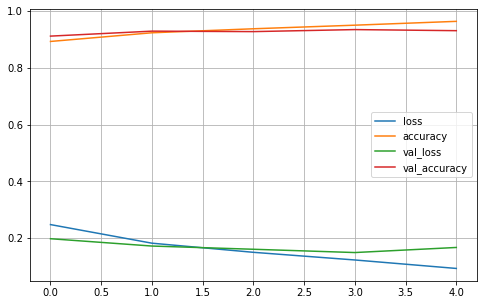

In [260]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [261]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [262]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("best_model.best.hdf5")
print("Loaded model from disk")

Loaded model from disk


In [263]:
loaded_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 100)         1874200   
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 256)               234496    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 2,108,953
Trainable params: 234,753
Non-trainable params: 1,874,200
_________________________________________________________________
